# Наполеон задумался о результатах контрольной 1 по ноду :)


<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Napoleon_Paul_Delaroche.jpg" height="500" width="400"> 


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# Задаченька 1 или Французы клюют только на французских покойников

Девятый семинар по наукам о данных мы начинаем на неделе с 18 мая. В этот день корсиканец Наполеон был провозглашён императором Франции. А нам настала пора загрузить файлик с оценками по ноду, `nod_2020-05-17.csv`.



In [2]:
data = pd.read_csv('nod_2020-05-17.csv')
data.dropna(subset=["k1"], inplace=True)
data.head()

,group,fio,contest_login,hse_mail,alt_mail,a1_coursera,a2_coursera,b_coursera,coursera,d1a,...,d3b,d3c,d3,k3a,k3b,k3c,k3,nakop,total,final
0,БЭК181,Аверьянов Николай Егорович,eds_python_2020_1,neaveryanov@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.520000,5.0
1,БЭК181,Алиев Эльнур Гашимович,eds_python_2020_2,egaliev_1@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.840000,4.0
2,БЭК181,Алтунина Анастасия Игоревна,eds_python_2020_3,aialtunina@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.140000,4.0
3,БЭК181,Байкалова Дарья Александровна,eds_python_2020_4,dabaykalova@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,4.0
4,БЭК181,Васьков Алексей Васильевич,eds_python_2020_5,avvaskov@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.566667,4.0


__а)__ Постройте гистограмму результатов за первую контрольную, переменная `k1` :)

In [3]:
# https://docs.scipy.org/doc/scipy/reference/stats.html
# pdf - probability density function - функция плотности
# cdf - cumulative distribution function - функция распределения 
# ppf - Percent point function (inverse of ``cdf``) 

norm_rv = stats.norm()
# квантили для двусторонних хвостов уровня значимости 0.05
alpha = 0.05
round(norm_rv.ppf(alpha/2), 2), round(norm_rv.ppf(1 - alpha/2), 2)

(-1.96, 1.96)

<img src>

<img src=https://online.stat.psu.edu/stat509/sites/onlinecourses.science.psu.edu.stat509/files/lesson06/normal_dist_plot/index.gif>

In [6]:
x = data.k1.values

mean_hat = x.mean()
std_hat = x.std()
min(data.k1.values), max(data.k1.values)

(0.0, 13.0)

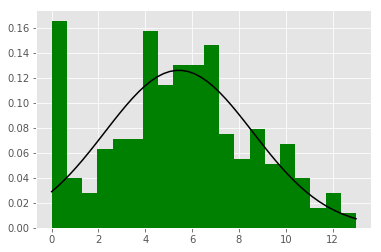

In [7]:
# строим гистограмму через matplotlib.pyplot

xs = np.linspace(0, 13)
ys = stats.norm(mean_hat, std_hat).pdf(xs)
plt.plot(xs, ys, color="black")
data.k1.hist(bins=20, density=True, color='g');

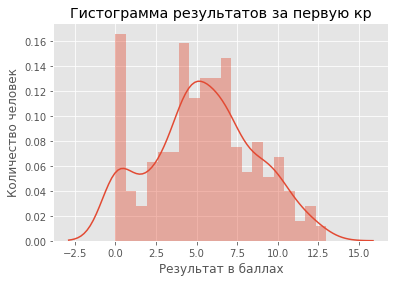

In [8]:
# способ построить гистограмму через seaborn
sns.distplot(data['k1'], bins=20);
plt.title('Гистограмма результатов за первую кр')
plt.xlabel('Результат в баллах')
plt.ylabel('Количество человек');

Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений!

__б)__ Постройте примерный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную.

$$
\left[\bar x - z_{crit} \sqrt{\frac{\hat\sigma^2}{n}} ; \bar x + z_{crit} \sqrt{\frac{\hat\sigma^2}{n}} \right]
$$

In [11]:
alpha = 0.05 # вероятность отклонить верную нулевую гипотезу (ошибка 1 рода)
mean_hat = x.mean()
var_hat = x.var()
n = x.size

# Точный доверительный интервал
# Предполагаем, что выборка нормальная => z_crit берём из распределения Стьюдента
t_crit = stats.t(n-1).ppf(1 - alpha/2)
left = mean_hat - t_crit * np.sqrt(var_hat/n)
right = mean_hat + t_crit * np.sqrt(var_hat/n)

print('Квантиль для Стьюдента', round(stats.t(n - 1).ppf(0.975), 4))
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.3}".format(left, right, right - left))

# Асимптотический доверительный интервал
# t(n) => N(0,1) при n -> inf 

z_crit = stats.norm.ppf(1 - alpha/2)
left = mean_hat - z_crit * np.sqrt(var_hat/n)
right = mean_hat + z_crit * np.sqrt(var_hat/n)

print('Квантиль для стандартного нормального распределения', round(stats.norm().ppf(0.975), 4))
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.3}".format(left, right, right - left))

Квантиль для Стьюдента 1.9661
Доверительный интервал [5.116; 5.746] ширины 0.63
Квантиль для стандартного нормального распределения 1.96
Доверительный интервал [5.117; 5.745] ширины 0.628


In [12]:
# Встроенный способ построить асимптотический 95% доверительный интервал 
mu_hat = x.mean()
sd_hat = np.sqrt(x.var()/n)
print(sd_hat)
stats.norm.interval(0.95, mu_hat, sd_hat)

0.16030867576380173


(5.117082820375691, 5.745481282188411)

In [13]:
def norm_conf_int(alpha, mean_hat, std_hat, margin=1):
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)

    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
            text_margin = -0.2
        else:
            xq = np.linspace(right, mean_hat + margin)
            text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

(5.117082820375691, 5.745481282188411)

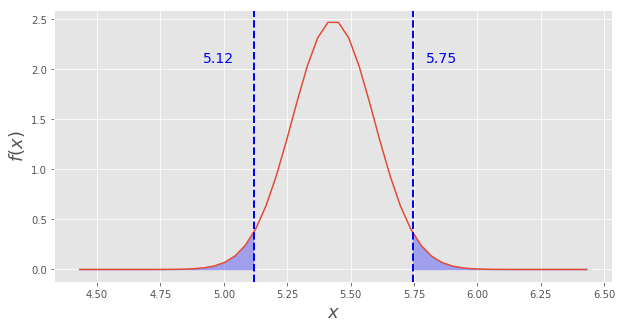

In [14]:
alpha = 0.05
mu_hat = x.mean()
sd_hat = np.sqrt(x.var()/n)

norm_conf_int(alpha, mu_hat, sd_hat)

Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `d1fraud == 0`, у Демонов `d1fraud > 0`.

__в)__ Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

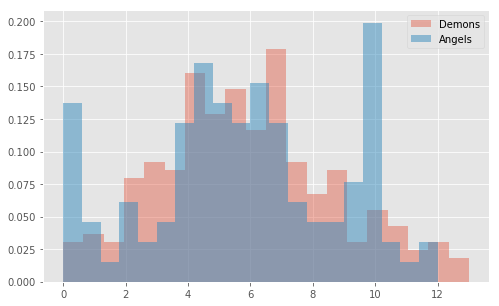

In [15]:
# matplotlib
plt.figure(figsize=(8,5))
data[data.d1fraud > 0]['k1'].hist(alpha=0.4, bins=20, density=True, label="Demons")
data[data.d1fraud == 0]['k1'].hist(alpha=0.5, bins=20, density=True, label="Angels")
plt.legend();

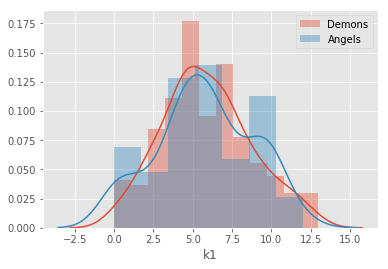

In [45]:
# seaborn
sns.distplot(data[data.d1fraud > 0]['k1'], label='Demons')
sns.distplot(data[data.d1fraud == 0]['k1'], label='Angels')
plt.legend()
plt.show()

__г)__ Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов. Без предположения о равенстве дисперсий.

$$
\left[\bar x - \bar y - z_{crit} \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}} ; \bar x - \bar y + z_{crit} \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}} \right]
$$

In [46]:
x = data[data.d1fraud > 0].k1
y = data[data.d1fraud == 0].k1

round(x.mean(), 3), round(y.mean(), 3)

(5.898, 5.76)

(-0.532833905384929, 0.8087678503390602)


(-0.532833905384929, 0.8087678503390602)

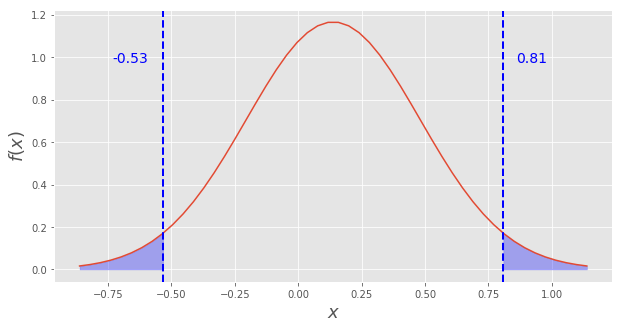

In [47]:
alpha = 0.05

diff = x.mean() - y.mean()
diff_sd = np.sqrt(x.var()/x.size + y.var()/y.size)

# асимптотический интервал для разности средних двух независимых выборок
norm_conf_int(alpha, diff, diff_sd)

In [48]:
# H_0 : m_a = m_d   <=>   m_a - m_d  = 0
# H_A : ma != m_d

z_obs = diff/diff_sd
z_obs # наблюдаемое значение

0.40311559813836373

In [49]:
alpha = 0.05 
z_crit = stats.norm.ppf(1 - alpha/2)
z_crit  # критическое значение 
#  -z_crit < z_obs <  z_crit => гипотеза не отвергается

1.959963984540054

In [50]:
# Задание: сделать дополнительный аргумент, который выбирает альтернативу 
# m_a != m_d  - two-sided
# m_a < m_d   - less
# m_a > m_d   - right

def norm_mean_test(mean_hat, std_hat, mu_0=0, alpha=0.05, margin=3):
    
    z_obs = (mean_hat - mu_0)/std_hat
    z_crit = stats.norm().ppf(1 - alpha/2)

    plt.figure(figsize = (10, 5))
    x = np.linspace(-margin, margin)
    pdf = norm_rv.pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]

    # Критические и наблюдаемые значения статистки 
    statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
    params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                   (z_crit, 0.05, z_crit, margin, 'b'),
                                   (-z_obs, -0.9, -margin, -z_obs, 'r'), 
                                   (z_obs, 0.3, z_obs, margin, 'r')]))                           
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        plt.text(statistic + text_margin, 
                 0.8*y_max, round(statistic, 3), color=color, fontsize=16)
        xq = np.linspace(left_bound, right_bound)
        yq = norm_rv.pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)

    p_value = 2*norm_rv.cdf(-z_obs)
    
    return p_value

0.6868631862796919

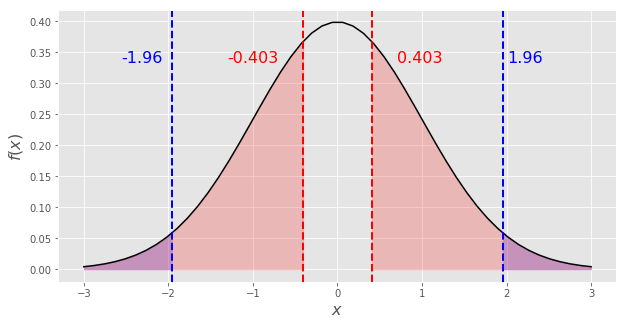

In [51]:
alpha = 0.05

diff = x.mean()-y.mean()
diff_sd = np.sqrt(x.var()/x.size + y.var()/y.size)

norm_mean_test(diff, diff_sd, mu_0=0, alpha=0.05, margin=3)

__д)__ Как изменятся результаты, если границу между Ангелами и Демонами провести по `d1fraud < 2.5` и `d1fraud > 2.5`?

0.6315581375559505

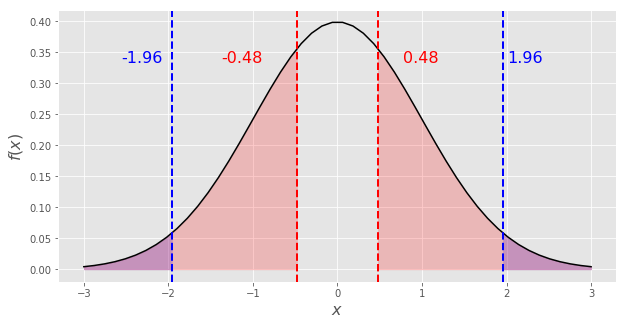

In [52]:
x1 = data[data.d1fraud >= 2.5].k1
y1 = data[data.d1fraud < 2.5].k1

alpha = 0.05
diff = y1.mean() - x1.mean()
diff_sd = np.sqrt(x1.var()/x1.size + y1.var()/y1.size)

norm_mean_test(diff, diff_sd, mu_0=0, alpha=0.05, margin=3)

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов.

__е)__ Проверьте гипотезу об одинаковой нервозности Ангелов и Демонов на уровне значимости $5\%$.

In [25]:
F_obs = x.var()/y.var()
n, m = x.size, y.size
F_obs

0.8546097465268333

In [26]:
alpha = 0.05
stats.f.ppf(alpha/2, n - 1, m - 1), stats.f.ppf(1 - alpha/2, n - 1, m - 1)
# Uипотеза об одинаковых дисперсиях не отвергается

(0.733126241700228, 1.3923435659305086)

__ё)__ Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Нарисуйте симпатичную картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. 

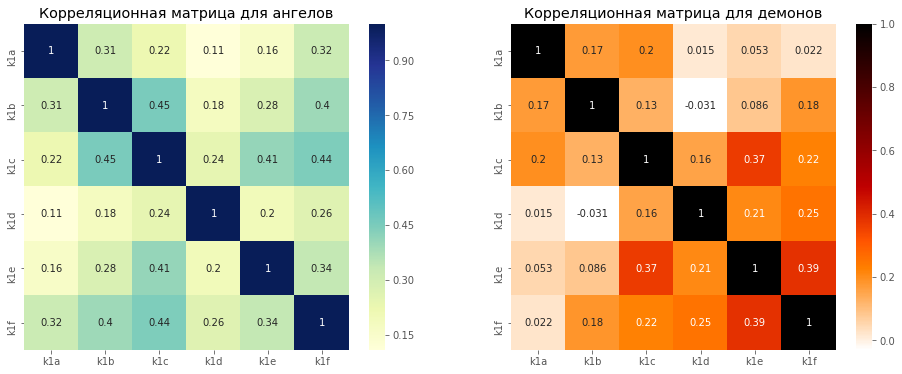

In [27]:
tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']

corr_angels = data[data.d1fraud == 0][tasks].fillna(0).corr()
corr_demons = data[data.d1fraud > 0][tasks].fillna(0).corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(corr_angels, cmap="YlGnBu", annot=True, ax=axes[0])
sns.heatmap(corr_demons , cmap="gist_heat_r", annot=True, ax=axes[1])
axes[0].set_title("Корреляционная матрица для ангелов")
axes[1].set_title("Корреляционная матрица для демонов");

# Симуляционная задачулька 2 про повторное тестирование

Сказка про то, что последовательное применение тестов без корректировки — это не очень хорошо :)

Жизнь исследователя Винни-Пуха прекрасна. Наблюдений много, гипотеза о равенстве ожиданий верна, а наблюдения — нормальны. 

А именно, величины $X_1$, ..., $X_{n}$ независимы и нормальны $N(0;1)$, величины $Y_1$, ..., $Y_n$ независимы и нормальны $N(0;2)$. И пусть $n_x=100$ и $n_y=200$.



Винни-Пух правда этого ничего не знает, потому что у него в голове опилки, и тестирует сначала гипотезу о равенстве дисперсий двух выборок на уровне значимости $5\%$.

__а)__ Проведите $10^6$ экспериментов, то есть $10^6$ раз попробуйте за Винни-Пуха проверить гипотезу. Хорошо бы $10^8$, но оттестируйте сначала свой код на $10^6$. 

Постройте гистограмму распределения тестовой статистики о равенстве дисперсий. В скольки процентах случаев гипотеза о равенстве дисперсий отвергнута? 

100%|██████████| 1000000/1000000 [00:55<00:00, 17897.93it/s]


99.8193


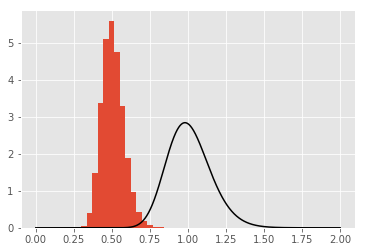

In [59]:
from tqdm import tqdm
import math

# Код для случая, когда выборки одинакового размера n_x = n_y = 200
# Сделайте симуляцию для выборок разного размера и сравните доли в задании а и б

n = 200
simulations_count = range(int(10**6))
alpha = 0.05
f_distibution = stats.f(n - 1, n - 1)

left_border = f_distibution.ppf(alpha/2)
right_border = f_distibution.ppf(1 - alpha/2)

statistics = []
in_interval = []

for _ in tqdm(simulations_count):
    x = np.random.normal(0, 1, n)
    y = np.random.normal(0, math.sqrt(2), n)
    statistic = x.var() / y.var()
    statistics.append(statistic)
    
    if left_border < statistic < right_border:
        in_interval.append((x, y))
    

xs = np.linspace(0, 2, 1000)
ys = f_distibution.pdf(xs)

plt.figure()
plt.hist(statistics, bins=20, density=True)
plt.plot(xs, ys, color="black")

print(np.mean([left_border > value or value > right_border 
               for value in statistics]) * 100)

__б)__ Если гипотеза о равенстве дисперсий не отвергается, то Винни использует $t$-статистику для проверки гипотезы о равенстве ожиданий при равенстве дисперсий. 

Для тех экспериментов, в которых гипотеза о равенстве дисперсий не отверглась, проверьте гипотезу о равенстве ожиданий на уровне значимости $5\%$. 

Постройте гистограмму распределения $t$-статистики. В скольки процентах случаев гипотеза о равенстве ожиданий отвергнута?

100%|██████████| 1807/1807 [00:00<00:00, 25724.42it/s]


0.06862202545655784


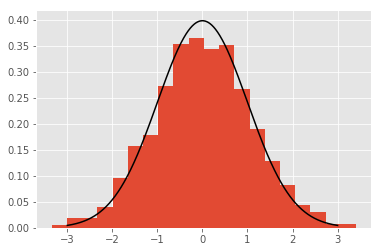

In [60]:
t_distibution = stats.t(2 * n - 2)

alpha = 0.05
left_border = t_distibution.ppf(alpha / 2)
right_border = t_distibution.ppf(1 - alpha/2)

statistics = []

for x, y in tqdm(in_interval):
    sp = math.sqrt(((n - 1) * x.var() + (n - 1) * y.var()) / (2 * n - 2))
    statistics.append((x.mean() - y.mean()) / (sp * math.sqrt(1.0 / n + 1.0 / n)))

xs = np.linspace(-3, 3, 1000)
ys = t_distibution.pdf(xs)

plt.figure()
plt.hist(statistics, bins=20, density=True)
plt.plot(xs, ys, color="black")

print(np.mean([left_border > value or value > right_border 
               for value in statistics]))

# ошибка 1 рода похожа на 0.07, а не на 0.05

__в)__ Словами объясните, почему нехорошо сначала тестировать на равенство дисперсий, а потом на равенство средних при равных дисперсиях, если на первом шаге гипотеза $H_0$ не отверглась. 

In [ ]:
'''
Фактическая вероятность ошибки первого рода похожа на 0.06, а не на 0.05.
Ошибка 1 рода - отвергнуть верную гипотезу. 
Это вызвано тем, что t-test мы можем использовать когда дисперсии равны,
а не когда гипотеза о равенстве дисперсий не отвергнута. 

Для двухвыборочных тестов несоблюдение требования равенства дисперсий 
(приводит к увеличению ошибки 1-го рода) допустимо, если:
* распределения соответствуют нормальному;
* выборки отличаются по размеру не больше, чем на 10%
'''

# Задачулька 3 о мимимишных мышках

[https://nplus1.ru/news/2018/05/11/mice-trolley](https://nplus1.ru/news/2018/05/11/mice-trolley) 

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей; следует, однако, уточнить, что удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$ если реальную, $2$ если на бумаге
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили кучу логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Этому добру вас будут учить на эконометрике, мы пойдём простым и не совсем правильным путём и будем проверять гипотезы в лоб. 

In [110]:
df = pd.read_csv("mouse.csv", sep="\t")
df.head()

,STUDY,AGE,GENDER,DECISION,DEO1,DEO2,DEO3,DEO4,DEO5,DEO6,...,AE,MOUSE1,MOUSE2,MOUSE3,MOUSE,DOUBT,OTHERCHOICE,UNCOMFORTABLE,NOSHOCK,RT
0,1,38,1,NaN,2,2,2,1,2,2,...,5.000000,6.0,5.0,5.0,5.333333,NaN,NaN,NaN,NaN,NaN
1,1,22,1,NaN,1,2,2,1,2,1,...,5.727273,5.0,6.0,6.0,5.666667,NaN,NaN,NaN,NaN,NaN
2,1,39,1,NaN,1,1,3,5,3,1,...,5.545455,6.0,6.0,6.0,6.000000,NaN,NaN,NaN,NaN,NaN
3,1,21,0,1.0,2,3,3,3,3,2,...,5.136364,4.0,7.0,7.0,6.000000,2.0,0.0,6.0,80.0,9.212427
4,1,20,0,1.0,4,2,2,2,2,2,...,4.181818,4.0,6.0,6.0,5.333333,4.0,0.0,6.5,75.0,17.071711


__Отдавайте себе отчёт о предпосылках теста, который вы используете.__


__а)__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

In [135]:
paper.mean(), real.mean()

(0.8645833333333334, 0.7469879518072289)

In [142]:
# в питоне версии > 3.5 лучше использовать f вместо .format()

df.dropna(subset=['DECISION'], inplace=True)

paper = df[df['STUDY'] == 1].DECISION
real = df[df['STUDY'] == 2].DECISION

alpha = 0.05
diff_mean = paper.mean() - real.mean()
diff_std = np.sqrt(paper.var()/paper.size + real.var()/real.size)

z_obs = diff_mean/diff_std
z_crit_left = stats.norm.ppf(alpha/2)
z_crit_right = stats.norm.ppf(1 - alpha/2)

print('{} is not in ({} , {}) => Decline H_0 on equal means'.format(round(z_obs,3), 
                                                                    round(z_crit_left,3), 
                                                                    round(z_crit_right, 3)))

2.177 is not in (-1.96 , 1.96) => Decline H_0 on equal means


__б)__ Правда ли, что женщины и мужчины принимают решению о нажатии на кнопку одинаково часто? А на бумаге?

In [134]:
men.mean(), women.mean()

(0.8705882352941177, 0.8105263157894737)

In [133]:
men = df[df['GENDER'] == 1].DECISION
women = df[df['GENDER'] == 0].DECISION

alpha = 0.05
diff_mean = men.mean() - women.mean()
diff_std = np.sqrt(men.var()/men.size + women.var()/women.size)

z_obs = diff_mean/diff_std
z_crit_left = stats.norm.ppf(alpha/2)
z_crit_right = stats.norm.ppf(1 - alpha/2)

print('{} is in ({} , {}) => H_0 on equal means is not declined'.format(round(z_obs,3), 
                                                                    round(z_crit_left,3), 
                                                                    round(z_crit_right, 3)))

1.294 is in (-1.96 , 1.96) => H_0 on equal means is not declined


In [137]:
men = df[(df['GENDER'] == 1) & (df['STUDY'] == 2)].DECISION
women = df[(df['GENDER'] == 0) & (df['STUDY'] == 2)].DECISION

alpha = 0.05
diff_mean = men.mean() - women.mean()
diff_std = np.sqrt(men.var()/men.size + women.var()/women.size)

z_obs = diff_mean/diff_std
z_crit_left = stats.norm.ppf(alpha/2)
z_crit_right = stats.norm.ppf(1 - alpha/2)

print('{} is in ({} , {}) => H_0 on equal means is not declined'.format(round(z_obs,3), 
                                                                    round(z_crit_left,3), 
                                                                    round(z_crit_right, 3)))

1.357 is in (-1.96 , 1.96) => H_0 on equal means is not declined


In [138]:
men.mean(), women.mean()

(0.85, 0.7142857142857143)

In [139]:
men.var(), women.var()

(0.13421052631578945, 0.20737327188940086)

__в)__ Правда ли, что женщины намного кровожаднее мужчин и жмут на кнопку гораздо быстрее?

In [147]:
men = df[(df['GENDER'] == 1)].RT
women = df[(df['GENDER'] == 0)].RT

alpha = 0.05
diff_mean = men.mean() - women.mean()
diff_std = np.sqrt(men.var()/men.size + women.var()/women.size)

z_obs = diff_mean/diff_std
z_crit = stats.norm.ppf(1 - alpha) # mean_w > mean_m

print('{} < {} => H_0 on equal means is not declined'.format(round(z_obs,3), round(z_crit,3)))

-1.725 < 1.645 => H_0 on equal means is not declined


__г)__ Предположим, что дисперсия времени нажатия на кнопку определяется эмоциональностью и романтичностью индивида. Правда ли, что романтичность женщин равна романтичности мужчин? 

In [150]:
men = df[(df['GENDER'] == 1)].RT
women = df[(df['GENDER'] == 0)].RT

alpha = 0.05
F_obs = men.var()/women.var()
n, m = men.size, women.size
F = stats.f.ppf(alpha/2, n - 1, m - 1), stats.f.ppf(1 - alpha/2, n - 1, m - 1)

print('{} is in ({} , {}) => H_0 on equal variations is not declined'.format(round(F_obs, 3), round(F[0],3), 
                                                                        round(F[1],3)))

0.958 is in (0.685 , 1.423) => H_0 on equal variations is not declined
